In [1]:
from model.mobilennet_v2 import MobileNetV2

model = MobileNetV2(**{'num_classes': 2, 'pretrained': False, 'features_fixed': True})

ModuleNotFoundError: No module named 'model.mobilennet_v2'

In [2]:
# getattr(import_module('model.mobilennet_v2'), 'MobileNetV2')(num_classes=2, pretrained=False, features_fixed=True)

In [3]:
model_setting = {
    'module': 'model.mobilennet_v2',
    'class': 'MobileNetV2',
    'MobileNetV2': {
        'num_classes': 2,
        'pretrained': False,
        'features_fixed': True
    }
}

model = create_instance(model_setting)

NameError: name 'create_instance' is not defined

In [4]:
from importlib import import_module
import yaml

def load_yaml(yaml_file):
    with open(yaml_file, mode='r', encoding='utf-8') as f:
        configs = yaml.safe_load(f)
    return configs

def create_instance(config, *args, **kwargs):
    module = config['module']
    name = config['class']
    config_kwargs = config.get(name, {})
    for key, value in config_kwargs.items():
        if isinstance(value, str):
            config_kwargs[key] = eval(value)
        elif isinstance(value, list):
            config_kwargs[key] = [eval(v) for v in value]

    return getattr(import_module(module), name)(*args, **config_kwargs, **kwargs)

In [5]:
config = load_yaml('config/hymenoptera_training.yaml')

In [6]:
model = create_instance(config['model'])

In [7]:
optimzer = create_instance(config['optimizer'], **{'params': model.parameters()})

In [8]:
lr_scheduler = create_instance(config['lr_scheduler'], **{'optimizer': optimzer})

In [9]:
import torchvision
train_dataset = create_instance(config['train_dataset'])

In [10]:
train_loader = create_instance(config['train_loader'], **{'dataset': train_dataset})

In [11]:
import cv2
import torch

def to_image(sample, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    mean = torch.tensor(mean, dtype=torch.float).view(3, 1, 1)
    std = torch.tensor(std, dtype=torch.float).view(3, 1, 1)

    sample = (sample * std + mean) * 255
    sample = sample.to(torch.uint8)
    sample = sample.permute(1, 2, 0).contiguous()
    image = sample.cpu().numpy()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image

In [12]:
train_iter = iter(train_loader)
samples, labels = train_iter.next()
print('batch samples shape:', samples.shape)
print('batch labels shape:', labels.shape)

batch samples shape: torch.Size([64, 3, 224, 224])
batch labels shape: torch.Size([64])


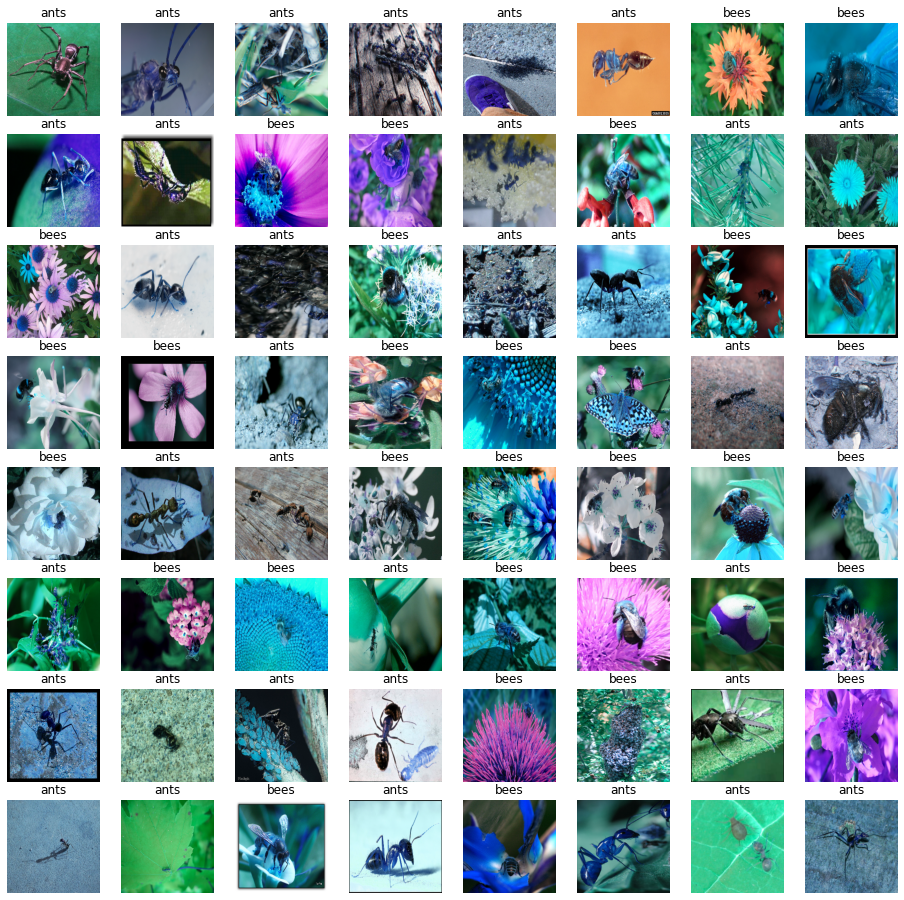

In [13]:
import torch
import matplotlib.pyplot as plt

classes = {0: 'ants', 1: 'bees'}

figure = plt.figure(figsize=(16, 16))

rows, columns = 8, 8
for idx, (sample, label) in enumerate(zip(samples, labels)):
    image = to_image(sample)
    figure.add_subplot(rows, columns, idx + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(classes[label.item()])

plt.show()

In [15]:
(1,2 ,3)

(1, 2, 3)